# Implementacion del modelo hecho en clase:

In [103]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as requests,sys,numpy as np, matplotlib, math, matplotlib.pyplot as plt,scipy
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from IPython.display import display


url = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'
df = pd.read_csv(url)
df
df = df.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

,date,Ecuador
0,-1,0.0
1,0,0.0
2,1,0.0
3,2,0.0
4,3,0.0
...,...,...
111,110,446.0
112,111,660.0
113,112,270.0
114,113,452.0


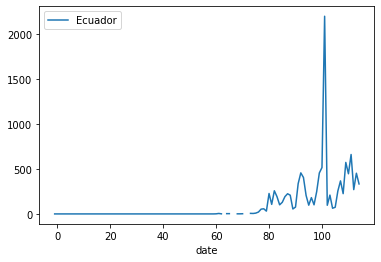

155.0
223.66


In [104]:
df.plot(x ='date', y='Ecuador')
plt.show()
filtro = df["Ecuador"][61:] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)

11338


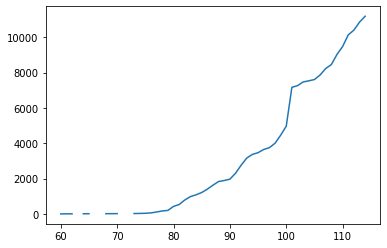

In [105]:
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
y = list(df_t.iloc [:, 1]) # Total casos
x = list(df_t.iloc [:, 0]) # Dias
x1 = list(df_t.iloc [:, 0]) # Dias
y1 = list(df_t.iloc [:, 1]) # Total casos
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

for i in range(x[-1], x[-1]):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x[61:], y[61:])
plt.show()

1. Comparar el modelo de predicion matematico vs probabilidad.

#### Modelo Polinomial

[1.0, 6.0, 7.0, 0, 10.0, 13.0, 0, 0, 14.0, 15.0, 17.0, 0, 0, 23.0, 28.0, 37.0, 58.0, 111.0, 168.0, 199.0, 426.0, 532.0, 789.0, 981.0, 1082.0, 1211.0, 1403.0, 1627.0, 1835.0, 1890.0, 1966.0, 2302.0, 2758.0, 3163.0, 3368.0, 3465.0, 3646.0, 3747.0, 3995.0, 4450.0, 4965.0, 7161.0, 7257.0, 7466.0, 7529.0, 7603.0, 7858.0, 8225.0, 8450.0, 9022.0, 9468.0, 10128.0, 10398.0, 10850.0, 11183.0]


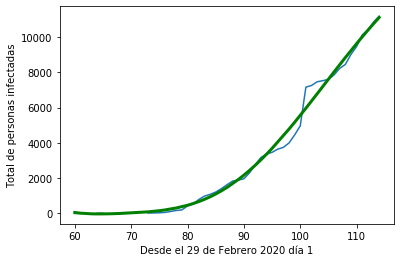

In [106]:
xx= x1[61:]
yy= y1[61:]
for i in range(len(yy)):
    if str(yy[i])=='nan':
        yy[i]=0
print(yy)
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.25)
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)   
poli_reg=PolynomialFeatures(degree=6)

X_train_poli = poli_reg.fit_transform(X_train)
X_test_p = poli_reg.fit_transform(X_test)
pr = linear_model.LinearRegression()
pr.fit(X_train_poli, y_train)
Y_predic = pr.predict(X_train_poli)
xt,yt=zip(*sorted(zip(X_train,Y_predic)))   
plt.xlabel("Desde el 29 de Febrero 2020 día 1")
plt.ylabel("Total de personas infectadas")
plt.plot(x[61:], y[61:],label='Probabilidad')
plt.plot(xt, yt, color='green', label='Grado 6', lineWidth=3)

plt.show()


En el grafico observamos una comparación entre modelo polinomial grado 6 (verde) y el probabilistico (azul)

2. Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.

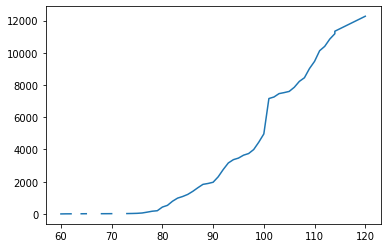

In [107]:
# Quiero predecir cuántos "Casos" voy a obtener de aqui a 10 dias.
for i in range(x1[-1], x1[-1]+7):
    x1.append(i)
    y1.append(int(y1[-1] + mediana))
plt.plot(x1[61:], y1[61:])
plt.show()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 7.0, 0, 10.0, 13.0, 0, 0, 14.0, 15.0, 17.0, 0, 0, 23.0, 28.0, 37.0, 58.0, 111.0, 168.0, 199.0, 426.0, 532.0, 789.0, 981.0, 1082.0, 1211.0, 1403.0, 1627.0, 1835.0, 1890.0, 1966.0, 2302.0, 2758.0, 3163.0, 3368.0, 3465.0, 3646.0, 3747.0, 3995.0, 4450.0, 4965.0, 7161.0, 7257.0, 7466.0, 7529.0, 7603.0, 7858.0, 8225.0, 8450.0, 9022.0, 9468.0, 10128.0, 10398.0, 10850.0, 11183.0, 11338, 11493, 11648, 11803, 11958, 12113, 12268]
[899999.         899998.99456633 899998.99456633 899998.99456633
 899998.99456633 899998.99456633 899998.99456633 899998.99456633
 899998.99456633 899998.99456633 899998.99456633 899998.99456633
 899998.99456633 899998.99456633 899998.99456633 899998.99456633


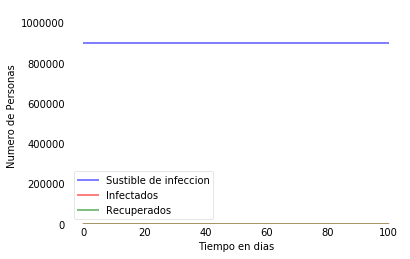

Beta:  0.8638086921101928 Gamma: 159.8370702380219
R0:  0.005404307591623453


In [108]:
def loss(point, data, recovered, s_0, i_0, r_0):
     
    size = len(data)
    beta, gamma = point
    
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

confirmed = y1
#print(confirmed.values)
#print(confirmed)
for i in range(len(confirmed)):
    #print(str(confirmed.values[i]))
    if str(confirmed[i])=='nan':
        confirmed[i]=0
print(confirmed)
data = (confirmed)

# Total de la poblacion
N = 900000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0



optimal = minimize(loss, [0.001, 0.001], args=(data, confirmed, S0, I0, R0), method='L-BFGS-B', bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])

beta, gamma = optimal.x


beta *= 10000000
gamma *= 100000
# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en 15 dias.
#beta, gamma = 0.589,0.045
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 100, 100)

# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados

print(S, I, R)

#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
fig.savefig(f"Cañar.png")
print("Beta: ",beta, "Gamma:",gamma)
Ro = beta/gamma
print('R0: ',Ro)

3. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales.

Solo cargan los datos para generar los modelos menos 7 dias.

In [109]:
xr=x1[61:len(x1)-7]
yr=y1[61:len(y1)-7]

61        1.0
62        5.0
63        1.0
64        NaN
65        3.0
66        3.0
67        NaN
68        NaN
69        1.0
70        1.0
71        2.0
72        NaN
73        NaN
74        6.0
75        5.0
76        9.0
77       21.0
78       53.0
79       57.0
80       31.0
81      227.0
82      106.0
83      257.0
84      192.0
85      101.0
86      129.0
87      192.0
88      224.0
89      208.0
90       55.0
91       76.0
92      336.0
93      456.0
94      405.0
95      205.0
96       97.0
97      181.0
98      101.0
99      248.0
100     455.0
101     515.0
102    2196.0
103      96.0
104     209.0
105      63.0
106      74.0
107     255.0
108     367.0
Name: Ecuador, dtype: float64
Mediana:  101.0
Media:  191.27906976744185
11284


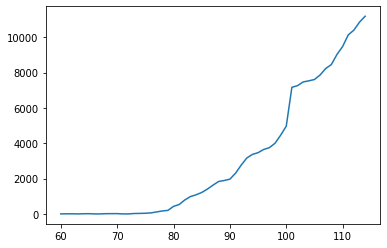

In [110]:
filtror = df["Ecuador"][61:len(df['Ecuador'])-7] # Filtro los datos que se empezo a tener casos
print(filtror)
#Obtenemos la mediana
mediar = filtror.mean()
medianar = filtror.median()
print('Mediana: ',medianar)
print('Media: ',mediar)
prediccion_siguienter = int(yr[-1] + medianar)
print(prediccion_siguienter)
plt.plot(xr, yr)
plt.show()

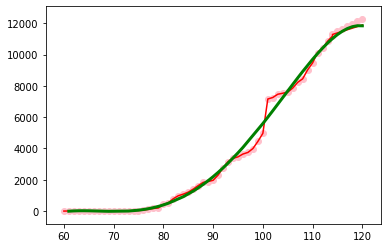

In [111]:
for i in range(xr[-1], xr[-1]+7):
    xr.append(i)
    yr.append(int(yr[-1] + medianar))
plt.plot(xr, yr,color='red', label='Probabilidad')

X_train1, X_test1, y_train1, y_test1 = train_test_split(xr, yr, test_size=0.25)
X_train1=np.array(X_train1).reshape(-1,1)
X_test1=np.array(X_test1).reshape(-1,1)   
poli_reg1=PolynomialFeatures(degree=6)

X_train_poli1 = poli_reg1.fit_transform(X_train1)
X_test_p1 = poli_reg1.fit_transform(X_test1)
pr1 = linear_model.LinearRegression()
pr1.fit(X_train_poli1, y_train1)
Y_predic1 = pr1.predict(X_train_poli1)
xt1,yt1=zip(*sorted(zip(X_train1,Y_predic1)))   
plt.plot(xt1, yt1, color='green', label='Polinomial Grado 6', lineWidth=3)


plt.scatter(x1[61:],y1[61:], color='pink', label="Reales")
plt.show()

# Análisis:

El código de implementación del probabilístico se implementa de mejor manera pero es un poco mas expenso de entrenar ya que hay que en base a datos diarios calcular la media y mediana, es decir si no se tiene estos datos no se podria hacer nada y debemos hacer otro proceso para obtenerlos.

## Conclusion:

En conclusion el modelo probabilistico se apega un poco mas a la realidad que los matemáticos como podemos ver en la grafica

# Criterio personal (politico, economico y social de la situacion)

Como criterio personal puedo acotar que la situacion actual del pais podria seguir en aumento ya que no se han hecho las pruebas necesarias y es por ello que las cifras que vemos son de dias anteriores mas no de actuales, lo que genera una vision de que cada dia aumenta sin tomar en cuenta que esos valores vienen de antes y los nuevos no conatremos con esos datos hasta los dias próximos donde notaremos si la curva decrece o sigue en aumento. Pero a pesar de esto se debe ver una solucuion ya que la economia va a ir en descenso.